# Data PreProcessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing packagesimport pandas as pd
import pandas as pd
import csv
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
##Loading csv files
path = r'/content/drive/MyDrive/ColabNotebooks/Lisboa_Estancia/IMU_Trials/all_IMUsamples_8people.csv'

df= pd.read_csv(path, skiprows=1, usecols=[0,1,2,3,4,5,6,7], names=['Trial_number','x1', 'y1', 'z1','x2', 'y2', 'z2','label'])
print (df.info)
print(df.shape)

#label outputs (y) Activities
y = pd.read_csv(path, usecols= [7])
print("y = \n",y)
print(y.shape)

#Standarizing
x = []
scaler = StandardScaler()
x = scaler.fit_transform(df)
x = pd.DataFrame(data = df, columns = ['x1','y1','z1','x2','y2','z2'])
print("x = \n",x)
print(x.shape)

#Verifying data shape
x.shape, y.shape   

#Counting number of samples per activity
y['label'].value_counts()

<bound method DataFrame.info of         Trial_number     x1     y1     z1     x2     y2     z2  label
0                  1  0.542 -1.177 -0.796 -2.141  2.420 -1.393      0
1                  1  0.536 -1.231 -0.780 -2.466 -0.073 -1.819      0
2                  1  0.516 -1.246 -0.779 -0.516 -2.029 -0.664      0
3                  1  0.499 -1.239 -0.787  0.035 -0.993 -1.221      0
4                  1  0.475 -1.207 -0.797 -1.330 -0.199 -2.408      0
...              ...    ...    ...    ...    ...    ...    ...    ...
281156            16  0.110 -0.015  0.077 -0.072  0.073 -0.031      2
281157            16  0.090  0.016  0.076 -0.072  0.073 -0.031      2
281158            16  0.074  0.052  0.079 -0.072  0.073 -0.031      2
281159            16  0.095  0.108  0.085 -0.072  0.073 -0.031      2
281160            16  0.143  0.170  0.092 -0.072  0.073 -0.031      2

[281161 rows x 8 columns]>
(281161, 8)
y = 
         label
0           0
1           0
2           0
3           0
4           

1    97200
0    92221
2    91740
Name: label, dtype: int64

## Create train and test subdatasets

In [ ]:
import tensorflow as tf
### Convert labels from [1,2,3] to [0,1,2]  Do it just in case the values starts in 1.
#y = y - 1
#print(y)

        label
0           0
1           0
2           0
3           0
4           0
...       ...
380264      2
380265      2
380266      2
380267      2
380268      2

[380269 rows x 1 columns]


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(224928, 6) (56233, 6)
(224928, 1) (56233, 1)


## Graphics

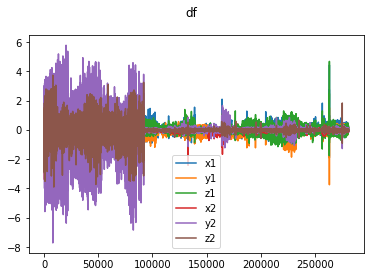

Loaded 281161 subjects


In [ ]:
name = 'df'
columns_names = ['x1','y1','z1','x2','y2','z2']
#plt.plot(df[name])
plt.plot(x)
plt.suptitle(name)
plt.legend(columns_names)
plt.show()

# plot the x, y, z acceleration and activities for multiple subjects
def plot_subject(subject):
	plt.figure()
	# create a plot for each column
	for col in range(subject.shape[0]):
		plt.subplot(subject.shape[0], 1, col+1)
		plt.plot(subject[:,col])
	plt.show()

# load
subjects = df
print('Loaded %d subjects' % len(subjects))


#Sliding Window Proccessing

In [ ]:
print(df.head())
print(df.shape)
#df.loc[3,"y2"]
#df.loc[2:4]
#print(df.loc[2:4])

dataset_size = df.shape[0] ### how many rows
window_size = 100 ### how many time steps we want to process simultaneously

xx = np.array([ x.loc[i:(i+window_size-1)].values for i in range(dataset_size-window_size) ])
#print(xx[0:5]).loc
print("shape(xx) = ", xx.shape)

yy = np.array([ y.loc[i].values for i in range(dataset_size-window_size) ])
print("shape(yy) = ", yy.shape)

#yy = np.array([ y.loc[i:(i+window_size-1)].values for i in range(dataset_size-window_size) ])
#print(yy[0:5])
#print("shape(yy) = ", yy.shape)
#yy[2].shape
#yy.reshape(-1,2)

   Trial_number     x1     y1     z1     x2     y2     z2  label
0             1  0.542 -1.177 -0.796 -2.141  2.420 -1.393      0
1             1  0.536 -1.231 -0.780 -2.466 -0.073 -1.819      0
2             1  0.516 -1.246 -0.779 -0.516 -2.029 -0.664      0
3             1  0.499 -1.239 -0.787  0.035 -0.993 -1.221      0
4             1  0.475 -1.207 -0.797 -1.330 -0.199 -2.408      0
(281161, 8)
shape(xx) =  (281061, 100, 6)
shape(yy) =  (281061, 1)


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)
X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size = 0.2)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(224848, 100, 6) (56213, 100, 6)
(224848, 1) (56213, 1)


# **CNN Architecture**

## TODO:

* **Add more subjects/data**
* **Use several frames simultaneously (sliding window part)**
* **Change the layer parameters (number of units per layer, number of layers)**
* **Check if the classification implementation and parameters are being done correctly**

**Read:**
* https://www.tensorflow.org/guide/keras/rnn
* https://www.tensorflow.org/tutorials/text/text_classification_rnn
* https://www.tensorflow.org/tutorials/images/classification



#### Load Tensorflow libraries

In [ ]:
import tensorflow as tf
import tensorflow.keras 
import tensorflow.keras.backend as K
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy
print(tf.version.VERSION)
print(tf.keras.__version__)

2.4.1
2.4.0


In [ ]:
print(X_train.shape) 
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(224848, 100, 6)
(56213, 100, 6)
(224848, 1)
(56213, 1)


In [ ]:
print(X_test[0:5])

[[[-0.13  -0.107 -0.334 -0.058 -0.022 -0.021]
  [-0.138 -0.091 -0.333 -0.054 -0.022 -0.011]
  [-0.146 -0.086 -0.328 -0.056 -0.029  0.005]
  ...
  [-0.009 -0.091 -0.102 -0.06  -0.005  0.001]
  [-0.009 -0.102 -0.1   -0.065  0.001  0.017]
  [-0.017 -0.1   -0.094 -0.072  0.003  0.011]]

 [[-0.305 -0.099  0.039 -0.273 -0.051 -0.12 ]
  [-0.316 -0.111  0.046 -0.253 -0.1   -0.163]
  [-0.322 -0.115  0.054 -0.185 -0.139 -0.258]
  ...
  [-0.178 -0.101 -0.064 -0.062  0.022 -0.032]
  [-0.19  -0.094 -0.079 -0.06   0.009 -0.05 ]
  [-0.202 -0.092 -0.095 -0.065  0.013 -0.037]]

 [[ 0.016  0.002 -0.203 -0.081  0.02  -0.033]
  [ 0.012  0.011 -0.168 -0.078 -0.007 -0.051]
  [ 0.048  0.011 -0.117 -0.094  0.    -0.065]
  ...
  [ 0.271 -0.033 -0.013 -0.071  0.017 -0.039]
  [ 0.385  0.114  0.031 -0.065  0.006 -0.053]
  [ 0.402  0.213  0.02  -0.086  0.02  -0.041]]

 [[ 0.094 -0.352 -0.084 -0.074  0.168 -0.087]
  [ 0.04  -0.352 -0.099 -0.085  0.119 -0.05 ]
  [-0.012 -0.345 -0.114 -0.092  0.159 -0.066]
  ...
  [ 

# **1D CNN Architecture**

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 98, 32)            608       
_________________________________________________________________
dropout (Dropout)            (None, 98, 32)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 49, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 8)                 12552     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 27        
Total params: 13,187
Trainable params: 13,187
Non-trainable params: 0
____________________________________________________

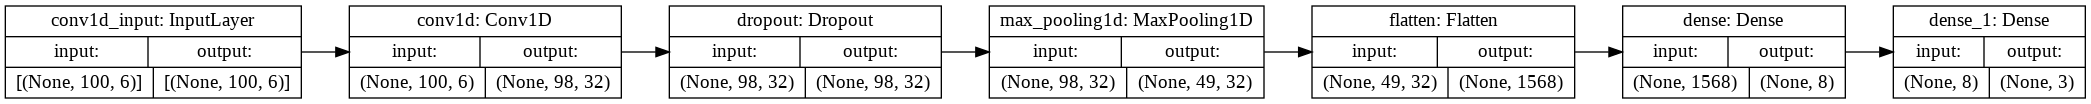

In [ ]:
input_dim = X_train.shape[1:] # number of columns/variables/features : 2x3 = 6
#timesteps= X_train.shape[1]
n_classes = 3
#n_outputs = y_train.shape[1] * y_train.shape[2]
#y_train = y_train.reshape((y_train.shape[0], n_outputs))
#print(y_train.shape)
#y_train.shape[1] * y_train.shape[2]
#y_test = y_test.shape[1] * y_test.shape[2]
#y_test = y_test.reshape((y_test.shape[0], y_test)

#n_outputs = np.unique(y_train).shape[0]
# input_dim = X_train.shape[2] # number of columns/variables/features : 2x3 = 6
# timesteps= X_train.shape[1]
# n_outputs = np.unique(y_train).shape[0]

### https://www.tensorflow.org/api_docs/python/tf/keras/losses 'sparse_categorical_crossentropy'

loss_function = 'sparse_categorical_crossentropy'

### https://www.tensorflow.org/api_docs/python/tf/keras/metrics 'sparse_categorical_accuracy'
score_function = 'sparse_categorical_accuracy'

### https://www.tensorflow.org/api_docs/python/tf/keras/activations
activation_function = 'relu'

### https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
optimizer_function = 'Adam'


K.clear_session()
# define the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(input_dim)))
#model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.compile(optimizer=optimizer_function, loss= loss_function, metrics=[score_function])

plot = tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, rankdir='LR')
print(model.summary())
plot

#n_timesteps = 100
#n_features = 6
#n_outputs = 3

# define the CNN model
#model = Sequential()
#model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
#model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(Dropout(0.5))
#model.add(MaxPooling1D(pool_size=2))
#model.add(Flatten())
#model.add(Dense(100, activation='relu'))
#model.add(Dense(n_outputs, activation='softmax'))

## Train network

In [ ]:
batch_size = 32
epochs = 20

start_time = time.perf_counter()

result = model.fit(X_train, y_train, epochs=epochs, verbose=1, batch_size=batch_size, validation_data=(X_test, y_test))

end_time = time.perf_counter()
run_time = (end_time - start_time)
print( "time = " + str(int(run_time)) + " s = " + str(int(run_time//60)) + " mins" )

Epoch 1/20
7027/7027 [==============================] - 45s 6ms/step - loss: 0.2735 - sparse_categorical_accuracy: 0.8920 - val_loss: 0.1676 - val_sparse_categorical_accuracy: 0.9444
Epoch 2/20
7027/7027 [==============================] - 44s 6ms/step - loss: 0.1545 - sparse_categorical_accuracy: 0.9430 - val_loss: 0.1356 - val_sparse_categorical_accuracy: 0.9517
Epoch 3/20
7027/7027 [==============================] - 45s 6ms/step - loss: 0.1332 - sparse_categorical_accuracy: 0.9499 - val_loss: 0.1193 - val_sparse_categorical_accuracy: 0.9587
Epoch 4/20
7027/7027 [==============================] - 45s 6ms/step - loss: 0.1145 - sparse_categorical_accuracy: 0.9565 - val_loss: 0.1441 - val_sparse_categorical_accuracy: 0.9449
Epoch 5/20
7027/7027 [==============================] - 45s 6ms/step - loss: 0.1039 - sparse_categorical_accuracy: 0.9606 - val_loss: 0.1002 - val_sparse_categorical_accuracy: 0.9658
Epoch 6/20
7027/7027 [==============================] - 44s 6ms/step - loss: 0.1009 -

## Plot results

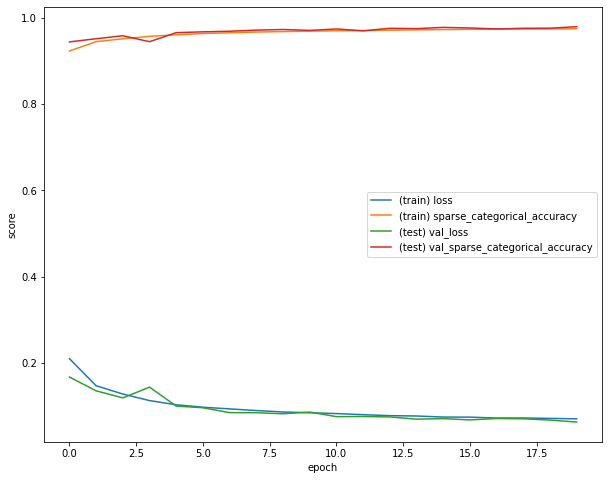

In [ ]:
datafolder = '/content/drive/MyDrive/ColabNotebooks/Lisboa_Estancia/IMU_Trials/'
fig = plt.figure(figsize=[10,8])
ax = fig.add_subplot(111)
for key in result.history :
  #if key == "loss" or key == "val_loss": continue
  label = ("(test) " if key.startswith("val_") else "(train) ") + key
  plt.plot(result.history[key], label=label)
#ax.set(ylim=[-0.1, 1.1])
ax.set(xlabel="epoch", ylabel="score")
ax.legend()
plt.show()
fig.savefig(datafolder + "plot-train_test_loss_metrics_CNN_1_8people.png")

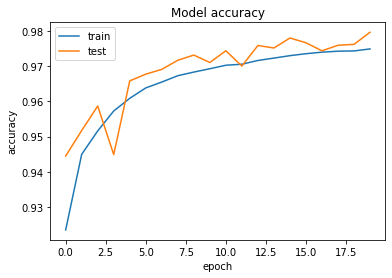

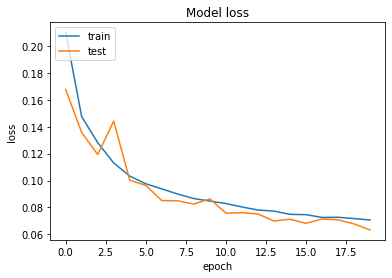

In [ ]:
# summarize history for accuracy
plt.plot(result.history['sparse_categorical_accuracy'])
plt.plot(result.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Save and load network

In [ ]:
### Save
datafolder = '/content/drive/MyDrive/ColabNotebooks/Lisboa_Estancia/IMU_Trials/'
dnn_filename = datafolder + "trained_network_p1_CNN_8people.h5"
model.save(dnn_filename)
print("Model saved to: " + dnn_filename)

### Load
model = tf.keras.models.load_model(datafolder + "trained_network_p1_CNN_8people.h5")
model.summary()

Model saved to: /content/drive/MyDrive/ColabNotebooks/Lisboa_Estancia/IMU_Trials/trained_network_p1_CNN_8people.h5
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 98, 32)            608       
_________________________________________________________________
dropout (Dropout)            (None, 98, 32)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 49, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 8)                 12552     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 27        
Total p

## Predict new data

In [ ]:
##Loading csv files
path = r'/content/drive/MyDrive/ColabNotebooks/Lisboa_Estancia/IMU_Trials/all_IMUsamples_2people.csv'

df= pd.read_csv(path, skiprows=1, usecols=[0,1,2,3,4,5,6,7], names=['Trial_number','x1', 'y1', 'z1','x2', 'y2', 'z2','label'])
print (df.info)
print(df.shape)

#label outputs (y) Activities
y = pd.read_csv(path, usecols= [7])
print("y = \n",y)
print(y.shape)

#Standarizing
x = []
scaler = StandardScaler()
x = scaler.fit_transform(df)
x = pd.DataFrame(data = df, columns = ['x1','y1','z1','x2','y2','z2'])
print("x = \n",x)
print(x.shape)

#Verifying data shape
x.shape, y.shape   

#Counting number of samples per activity
y['label'].value_counts()

### Windowing
print(df.head())
print(df.shape)
#df.loc[3,"y2"]
df.loc[2:4]

dataset_size = df.shape[0] ### how many rows
window_size = 100 ### how many time steps we want to process simultaneously

X_test = np.array([ x.loc[i:(i+window_size-1)].values for i in range(dataset_size-window_size) ])
print(X_test[0:5])
print("shape(X_test) = ", X_test.shape)


y_test= np.array([ y.loc[i].values for i in range(dataset_size-window_size) ])
print(y_test[0:5])
print("shape(y_test) = ", y_test.shape)

<bound method DataFrame.info of        Trial_number     x1     y1     z1     x2     y2     z2  label
0                17  0.039  0.008 -0.016 -0.070  0.007 -0.009      0
1                17  0.038  0.010 -0.013 -0.073  0.007 -0.007      0
2                17  0.034  0.008 -0.012 -0.073  0.004 -0.009      0
3                17  0.025  0.008 -0.010 -0.073  0.008 -0.008      0
4                17  0.026  0.010 -0.013 -0.073  0.007 -0.009      0
...             ...    ...    ...    ...    ...    ...    ...    ...
99103            20 -0.090 -0.068 -0.091 -0.088  0.036 -0.048      2
99104            20 -0.085 -0.069 -0.079 -0.088  0.036 -0.048      2
99105            20 -0.078 -0.073 -0.064 -0.088  0.036 -0.048      2
99106            20 -0.080 -0.079 -0.059 -0.088  0.036 -0.048      2
99107            20 -0.092 -0.083 -0.069 -0.088  0.036 -0.048      2

[99108 rows x 8 columns]>
(99108, 8)
y = 
        label
0          0
1          0
2          0
3          0
4          0
...      ...
99103

In [ ]:
import tensorflow as tf
import tensorflow.keras
import tensorflow.keras.backend as K

print(tf.version.VERSION)
print(tf.keras.__version__)

2.7.0
2.7.0


In [ ]:
datafolder = '/content/drive/MyDrive/ColabNotebooks/Lisboa_Estancia/IMU_Trials/'
### Load
model = tf.keras.models.load_model(datafolder + "trained_network_p1_CNN_8people.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 98, 32)            608       
                                                                 
 dropout (Dropout)           (None, 98, 32)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 49, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 8)                 12552     
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                        

In [ ]:
#X_test = X_test.reshape((X_test.shape[0], 1, 10, 6))
start_time = time.perf_counter()
y_pred = model.predict(X_test)
end_time = time.perf_counter()

test_size = X_test.shape[0]
total_predict_time = (end_time - start_time) # in seconds
prediction_time_per_sample = round( ( (end_time - start_time)*1000)/test_size ,5) # in milliseconds
print(prediction_time_per_sample)

0.06551


In [ ]:
y_pred = model.predict(X_test)
print(y_pred.shape)
print(y_pred[0:20])
loss_function = 'sparse_categorical_crossentropy'
score_function = 'sparse_categorical_accuracy'
scores = model.evaluate(X_test, y_test)
print(loss_function," = ",scores[0])
print(score_function," = ",scores[1])

(99008, 3)
[[0.3503211  0.6144912  0.03518761]
 [0.35373035 0.60982585 0.03644376]
 [0.3595773  0.6036547  0.03676801]
 [0.35441124 0.60740775 0.03818109]
 [0.36168617 0.59873533 0.03957851]
 [0.3615755  0.59532964 0.04309489]
 [0.36693484 0.5885021  0.04456307]
 [0.36270317 0.59258914 0.04470763]
 [0.36402756 0.5936346  0.04233781]
 [0.35647294 0.59899825 0.04452879]
 [0.36085734 0.59231335 0.04682935]
 [0.35933295 0.59298253 0.04768458]
 [0.36800033 0.5841968  0.04780291]
 [0.37067246 0.5820899  0.04723759]
 [0.3843003  0.5691104  0.04658929]
 [0.38807088 0.56623197 0.04569707]
 [0.39510402 0.5584545  0.0464414 ]
 [0.3877729  0.56474847 0.04747875]
 [0.39302874 0.5569545  0.0500167 ]
 [0.3924834  0.5546331  0.0528835 ]]
3094/3094 [==============================] - 6s 2ms/step - loss: 0.3488 - sparse_categorical_accuracy: 0.9134
sparse_categorical_crossentropy  =  0.34876111149787903
sparse_categorical_accuracy  =  0.9134211540222168


Testing Accuracy: sparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_cat

Text(0.5, 89.56999999999996, 'Predicted label')

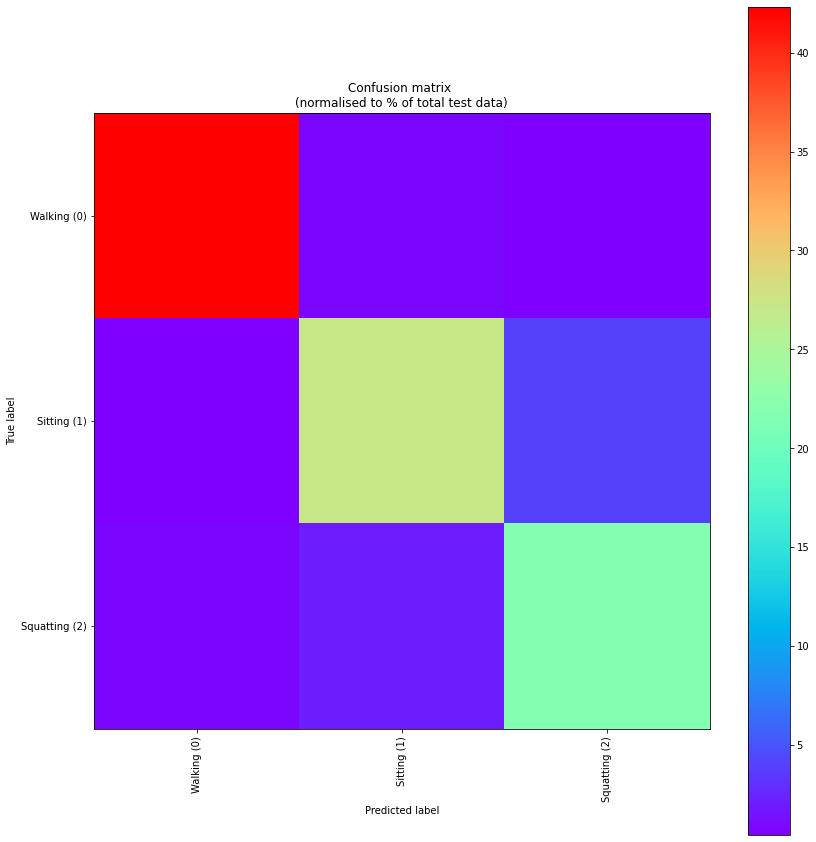

In [ ]:
# Results
import mlxtend

from sklearn import metrics 
predictions = y_pred.argmax(1)

print("Testing Accuracy: {}%".format(100*score_function))

print("")
print("Precision: {}%".format(100*metrics.precision_score(y_test, predictions, average="weighted")))
print("Recall: {}%".format(100*metrics.recall_score(y_test, predictions, average="weighted")))
print("f1_score: {}%".format(100*metrics.f1_score(y_test, predictions, average="weighted")))

print("")
print("Confusion Matrix:")
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
print(confusion_matrix)
normalised_confusion_matrix = np.array(confusion_matrix, dtype=np.float32)/np.sum(confusion_matrix)*100

print("")
print("Confusion matrix (normalised to % of total test data):")
print(normalised_confusion_matrix)
print("Note: training and testing data is not equally distributed amongst classes, ")
print("so it is normal that more than a 6th of the data is correctly classifier in the last category.")

# Plot Results:
width = 12
height = 12
plt.figure(figsize=(width, height))
plt.imshow(normalised_confusion_matrix,interpolation='nearest', cmap=plt.cm.rainbow)
plt.title("Confusion matrix \n(normalised to % of total test data)")
plt.colorbar()
LABELS = ['Walking (0)', 'Sitting (1)', 'Squatting (2)']
tick_marks = np.arange(n_classes)
plt.xticks(tick_marks, LABELS, rotation=90)
plt.yticks(tick_marks, LABELS)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [1]:
import numpy as np

confusion_matrix =np.asarray([[41897,   806,   447],
                              [536, 26983,  3868],
                              [904, 2011, 21556]])
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)
FP=FP.sum()
FN = FN.sum()
TP = TP.sum()
TN = TN.sum()
print(FP)
print(FN)
print(TP)
print(TN)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print(TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print(TNR)
# Precision or positive predictive value
PPV = TP/(TP+FP)
print(PPV)

8572
8572
90436
189444
0.9134211376858435
0.9567105688429218
0.9134211376858435


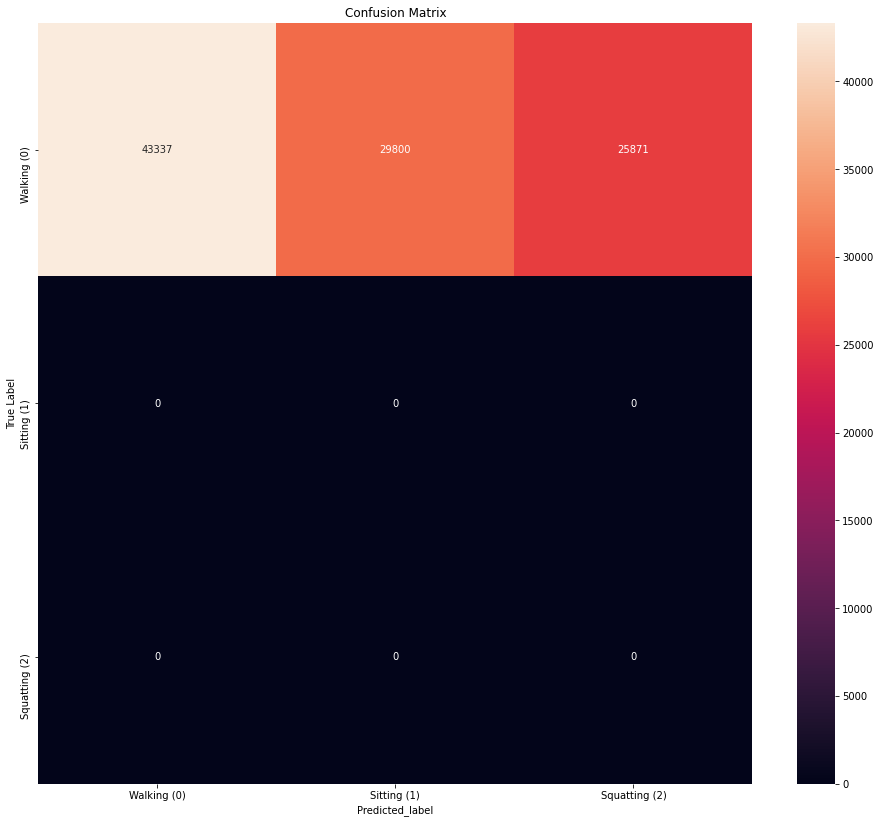

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

max_test = np.argmax(y_test, axis=1) 
max_predictions = np.argmax(y_pred, axis = 1) 
confusion_matrix = confusion_matrix(max_test, max_predictions)
LABELS = ['Walking (0)', 'Sitting (1)', 'Squatting (2)']

plt.figure(figsize=(16,14)) 
sns.heatmap(confusion_matrix, xticklabels = LABELS, yticklabels = LABELS, annot =True, fmt = "d") 
plt.title("Confusion Matrix") 
plt.xlabel('Predicted_label') 
plt.ylabel('True Label') 
plt.show() 

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/plot_confusion_matrix.py:59: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f92cffd5c50>)

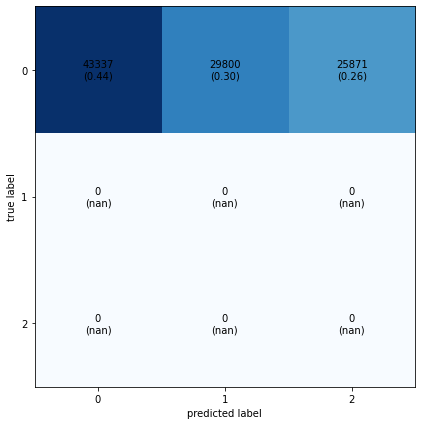

In [ ]:
# Confusion matrix
# !pip3 install mlxtend
import mlxtend
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import numpy as np

max_test = np.argmax(y_test, axis= -1) 
max_predictions = np.argmax(y_pred, axis = -1) 
mat = confusion_matrix(max_test, max_predictions)
LABELS = ['Walking (0)', 'Sitting (1)', 'Squatting (2)']
# plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True, figsize=(7,7))
plot_confusion_matrix(conf_mat=mat,  show_normed=True, figsize=(7,7))

In [ ]:
#2D CNN Architecture 
from tensorflow.keras.layers import Conv2D, MaxPooling2D
input_dim = X_train.shape[2] # number of columns/variables/features : 2x3 = 6
timesteps= X_train.shape[1]
n_outputs = np.unique(y_train).shape[0]

print("input_dim = ", input_dim)
print("num_classes = ", n_outputs)

### https://www.tensorflow.org/api_docs/python/tf/keras/losses 'sparse_categorical_crossentropy'
loss_function = 'categorical_crossentropy'

### https://www.tensorflow.org/api_docs/python/tf/keras/metrics 'sparse_categorical_accuracy'
score_function = 'accuracy'

### https://www.tensorflow.org/api_docs/python/tf/keras/activations
activation_function = 'relu'

### https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
optimizer_function = 'adam'

K.clear_session()

# define the CNN model
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = (input_dim, timesteps)))
model.add(Dropout(0.1))
model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

model.compile(optimizer=optimizer_function, loss=loss_function, metrics=[score_function])

plot = tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, rankdir='LR')
print(model.summary())
plot

input_dim =  6
num_classes =  6


ValueError: ignored

In [ ]:
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])